In [ ]:
# ht3
# Roberto Rios
# Javier Valle 20159


C:\Users\sebas\AppData\Local\Temp\ipykernel_19224\2758044105.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = csv.corr()


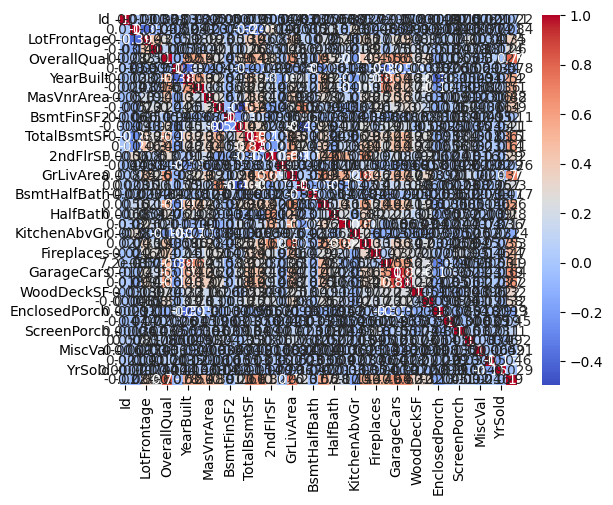

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [11]:
# Ejercicio 5: Haga ingeniería de características, ¿qué variables cree que puedan ser mejores predictores para el precio de las casas? Explique en que basó la selección o no de las variables. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Verificando que variables pueden ser mejores predictores para el precio de las casas.
csv = pd.read_csv('train.csv')
csv.head()

# Calcular matriz de correlación
corr_matrix = csv.corr()

# Visualizar matriz de correlación con Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Viendo las columnas que tienen una correlación mayor a 0.5.
corr_matrix['SalePrice'].sort_values(ascending=False)



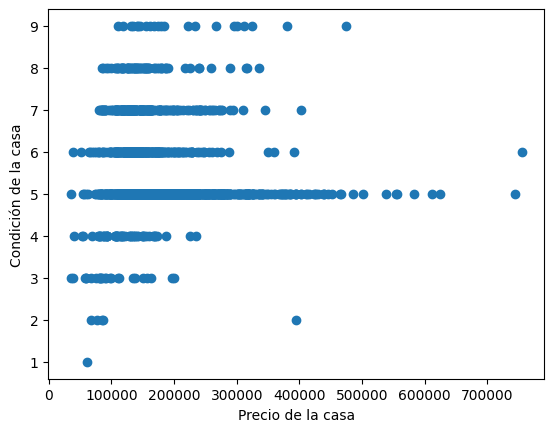

Coeficiente:  [[-1.09057474e-06]]
Intercepto:  [5.77265055]


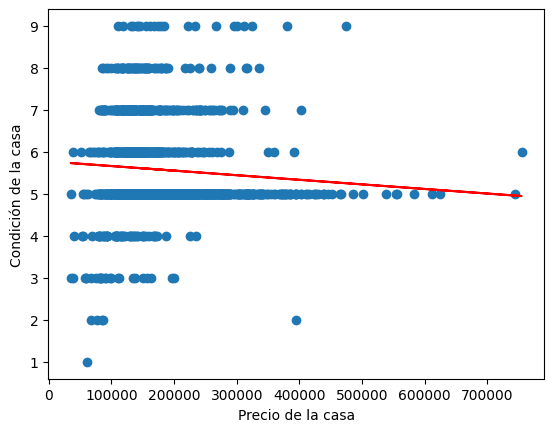

Coeficiente de determinación: 0.006061540238119001
Error cuadrático medio (MSE): 1.2299731981421889


In [19]:
# Inciso 7

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

datos = pd.read_csv('train.csv')

x = datos["SalePrice"].values.reshape(-1,1)
y = datos["OverallCond"].values.reshape(-1,1)

plt.scatter(x,y)

plt.xlabel("Precio de la casa")
plt.ylabel("Condición de la casa")
plt.show()

# Creando el modelo de regresión lineal.
regresion = LinearRegression()

# Entrenando el modelo.
regresion.fit(x,y)

# Calculando el coeficiente y el intercepto.
coeficiente = regresion.coef_
intercepto = regresion.intercept_

print("Coeficiente: ", coeficiente)
print("Intercepto: ", intercepto)

plt.scatter(x, y)
plt.plot(x, regresion.predict(x), color='red')

plt.xlabel("Precio de la casa")
plt.ylabel("Condición de la casa")

plt.show()

# Calculando el error cuadrático medio.
r_sq = regresion.score(x, y)

print('Coeficiente de determinación:', r_sq)

y_pred = regresion.predict(x)
mse = mean_squared_error(y, y_pred)
print('Error cuadrático medio (MSE):', mse)



In [4]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [5]:
df = read_csv('train.csv')
# df = pd.DataFrame()

print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [24]:
# Ejercicio 9
import statsmodels.api as sm

# Imprimiendo la matriz de correlación.
corr_matrix = df.corr()

corr_matrix

# Determinando que variables tienen una correlación mayor a 0.7
corr_matrix['SalePrice'].sort_values(ascending=False)

a = df["SalePrice"]
b = df["GrLivArea"]

a = sm.add_constant(a)
model = sm.OLS(b, a).fit()
model.summary()

x = df["OverallQual"]
y = df["SalePrice"]

# Creando el modelo de regresión lineal.
x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit()
model1.summary()


C:\Users\sebas\AppData\Local\Temp\ipykernel_19224\1303657821.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          2.19e-313
Time:                        17:52:59   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""